# Paper pictures

In [19]:
import sys
#sys.path.insert(0, 'C:/Users/hamme/Documents/GitHubVACAO/PAGOS/src/') #<- hier musst du auf den Ordner wechseln, wo du den PAGOS-Repository heruntergeladen hast
from pagos import Q
from pagos.modelling import GasExchangeModel
from pagos.builtin_models import taylor_swif, taylor_swift, dwarf, qs_dwarf
from pagos import plotting as pplt
from pagos import constants as pco
from pagos import gas as pga
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np

In [20]:
CTD = pd.read_csv("data/SO21_ctd_noheader.tab", delimiter='\t')
int_columns_withflag = ['Event', 'Date/Time', 'Latitude', 'Longitude', 'Press [dbar]',
       'Depth water [m]', 'Temp [°C]', 'QF water temp', 'Tpot [°C]', 'QF Tpot',
       'Tcon [°C]', 'QF Tcon', 'Sal', 'QF sal', 'ASAL [g/kg]', 'QF ASAL',
       'Density [kg/m**3]', 'QF rho']
int_columns = ['Event', 'Date/Time', 'Latitude', 'Longitude', 'Press [dbar]',
       'Depth water [m]', 'Temp [°C]', 'Tpot [°C]', 'Tcon [°C]', 'Sal', 'ASAL [g/kg]', 'Density [kg/m**3]']
CTD = CTD[int_columns]
Stations = []
Event =  CTD['Event']
for SO in Event:
    Stations += [int(SO[-5:-3])]
CTD.insert(2, 'Station', Stations)

In [21]:
vacao_data = pd.read_csv('data/NG_data_all_avg_final_adjusted.CSV')

In [22]:
noblegases = ['He', 'Ne', 'Ar', 'Kr', 'Xe']
vacao_colors = {5:'#D81B60', 8:'#1E88E5', 16:'#FFC107', 20:'#91FF5F', 28:'#C7C7C7', 46:'#000000'}

### Temperature and Salinity

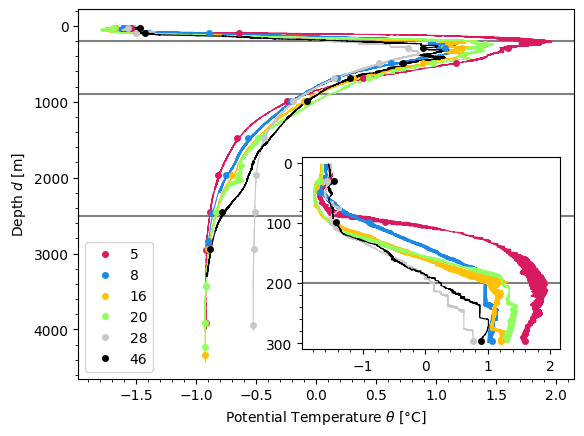

In [23]:
stationsNG = list(vacao_colors.keys())

fig, ax = plt.subplots()
sub_axes = ax.inset_axes([0.45, 0.08, .52, .52]) 
for station in stationsNG:
    CTDstation = CTD.loc[CTD['Station'] == station]
    CTDstationT = CTDstation.sort_values(['Depth water [m]'], ascending=False, ignore_index=True)
    Tstation = CTDstationT['Tpot [°C]']
    #depth =  CTDstationT['Depth water [m]'] #*(-1)
    depth =  CTDstationT['Press [dbar]'] #*(-1)
    #print(station, np.array(depth)[-1], np.array(Tstation)[-1], depth[np.argmax(np.array(Tstation))], np.max(np.array(Tstation)))
    ax.plot(Tstation, depth, color = vacao_colors[station], zorder = -1, lw = 0.8)
    depthlim = 300
    Xmask = np.where(depth < depthlim, Tstation, np.nan)
    Ymask = np.where(depth < depthlim, depth, np.nan)
    sub_axes.plot(Xmask, Ymask, color =vacao_colors[station], lw = 0.8, zorder = -1)
    sub_axes.set_ylim(310,-10) 
    VACAOs = vacao_data.loc[vacao_data['Station'] == station]
    TVACAO = VACAOs['T']
    VACAOD = VACAOs['Depth'] #*(-1)
    #print(station, np.array(VACAOD)[0], np.array(TVACAO)[0])
    XVACAOmask = np.where(VACAOD < depthlim, TVACAO, np.nan)
    YVACAOmask = np.where(VACAOD < depthlim, VACAOD, np.nan)
    sub_axes.scatter(XVACAOmask, YVACAOmask, color=vacao_colors[station], marker = 'o', zorder = 1, s=4**2)
    ax.scatter(TVACAO, VACAOD, color=vacao_colors[station], marker = 'o', zorder = 1, s=4**2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
sub_axes.xaxis.set_minor_locator(AutoMinorLocator())
sub_axes.yaxis.set_minor_locator(AutoMinorLocator())
ax.axhline(200, color = 'grey', zorder = -3)
ax.axhline(900, color = 'grey', zorder = -3)
ax.axhline(2500, color = 'grey', zorder = -3)
sub_axes.axhline(200, color = 'grey', zorder = -3)
ax.legend([Line2D([0], [0], marker="o",ms = 4, color=vacao_colors[s], linewidth=0) for s in vacao_colors.keys()],vacao_colors.keys())
#ax.set_title('Potential Temperature SAS-Oden 2021')
ax.set_xlabel('Potential Temperature $\\theta$ [°C]')
ax.set_ylabel('Depth $d$ [m]')
plt.gca().invert_yaxis()
plt.savefig('plots/paper/PotentialTemperature_inset.pdf', dpi = 900)

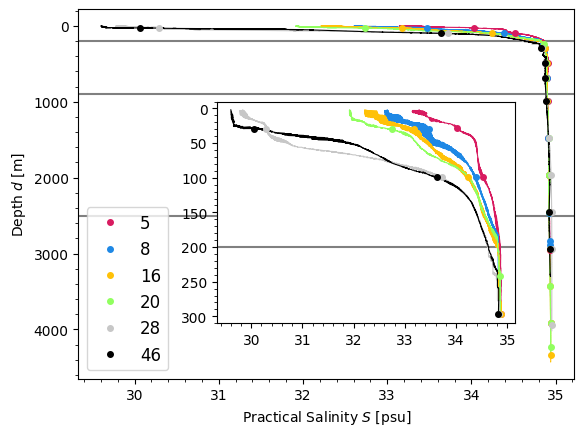

In [24]:
fig, ax = plt.subplots()
fs = 10
sub_axes = ax.inset_axes([0.28, 0.15, .6, .6]) 
for station in stationsNG:
    CTDstation = CTD.loc[CTD['Station'] == station]
    CTDstationT = CTDstation.sort_values(['Depth water [m]'], ascending=False, ignore_index=True)
    Sstation = CTDstationT['Sal']
    #depth =  CTDstationT['Depth water [m]']
    depth =  CTDstationT['Press [dbar]']
    ax.plot(Sstation, depth, color = vacao_colors[station], zorder = -1, lw = 0.8)
    depthlim = 300
    Xmask = np.where(depth < depthlim, Sstation, np.nan)
    Ymask = np.where(depth < depthlim, depth, np.nan)
    sub_axes.plot(Xmask, Ymask, color =vacao_colors[station], lw = 0.8, zorder = -1)
    sub_axes.set_ylim(310,-10) 
    #print(station, Xmask[-1], Ymask[-1])
    VACAOs = vacao_data.loc[vacao_data['Station'] == station]
    SVACAO = VACAOs['S']
    VACAOD = VACAOs['Depth']
    XVACAOmask = np.where(VACAOD < depthlim, SVACAO, np.nan)
    YVACAOmask = np.where(VACAOD < depthlim, VACAOD, np.nan)
    sub_axes.scatter(XVACAOmask, YVACAOmask, color=vacao_colors[station], marker = 'o', zorder = 1, s = 4**2)
    ax.scatter(SVACAO, VACAOD, color=vacao_colors[station], marker = 'o', zorder = 1, s=4**2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
sub_axes.xaxis.set_minor_locator(AutoMinorLocator())
sub_axes.yaxis.set_minor_locator(AutoMinorLocator())
ax.axhline(200, color = 'grey', zorder = -3)
ax.axhline(900, color = 'grey', zorder = -3)
ax.axhline(2500, color = 'grey', zorder = -3)
sub_axes.axhline(200, color = 'grey', zorder = -3)
ax.legend([Line2D([0], [0], marker="o", color=vacao_colors[s], linewidth=0, ms =4) for s in vacao_colors.keys()],vacao_colors.keys(), fontsize = 12)
#ax.set_title('Practical Salinity SAS-Oden 2021', fontsize = 20)
ax.set_xlabel('Practical Salinity $S$ [psu]', fontsize = fs)
ax.set_ylabel('Depth $d$ [m]', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs)
sub_axes.tick_params(axis='both', which='minor', labelsize=fs)
plt.gca().invert_yaxis()
plt.savefig('plots/paper/PracticalSalinitySurface.pdf', dpi = 900)

### VACAO Data plot

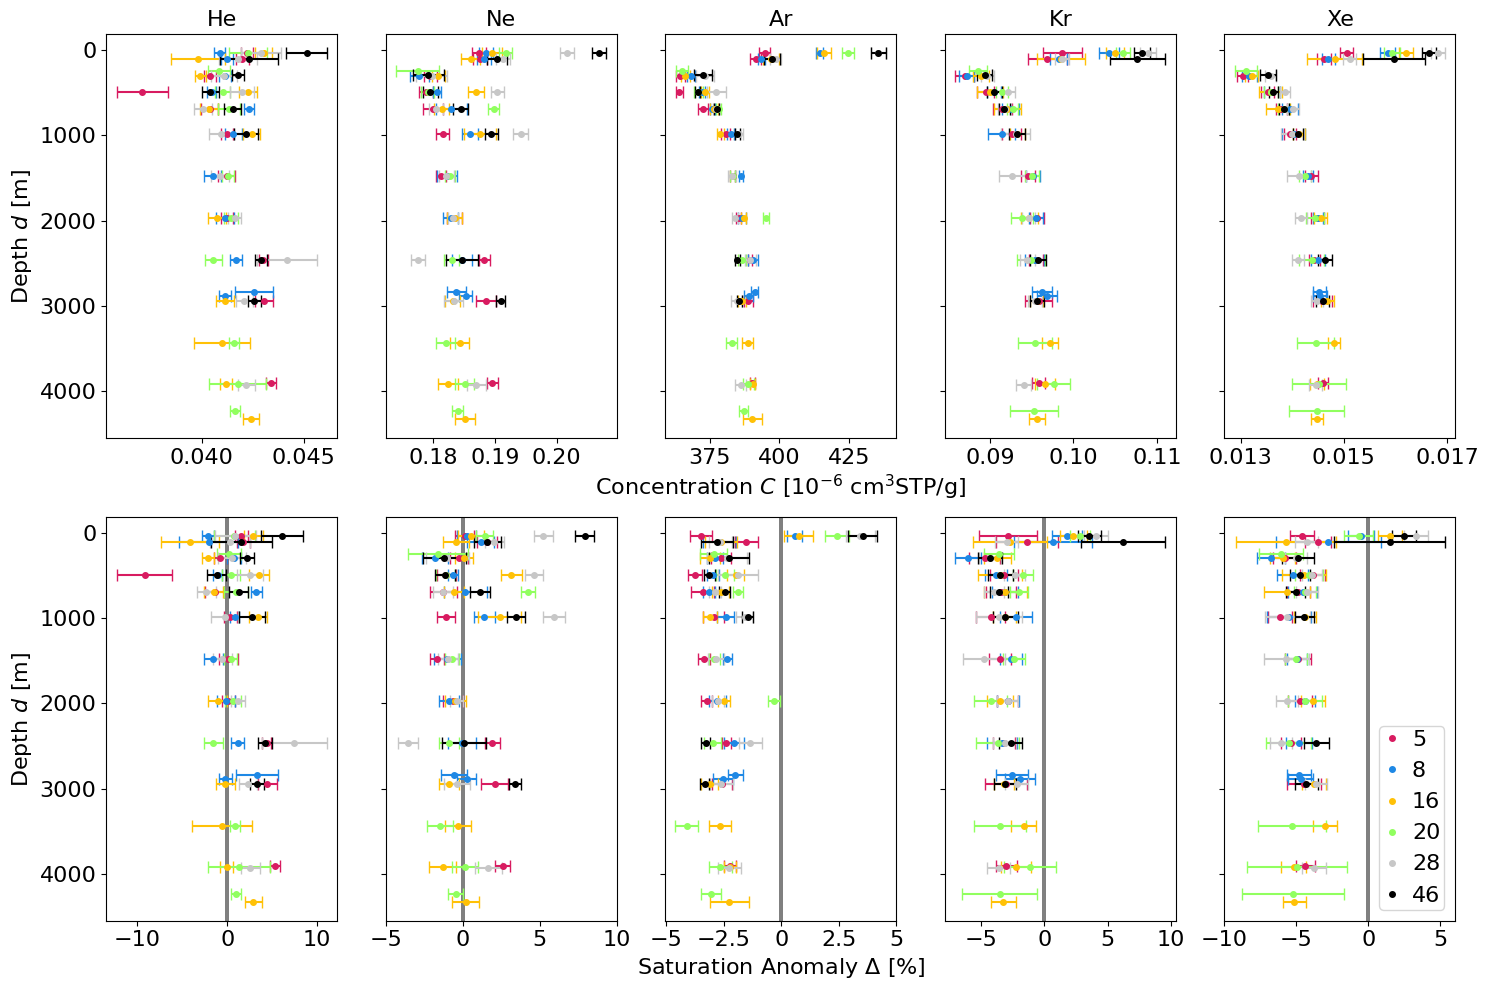

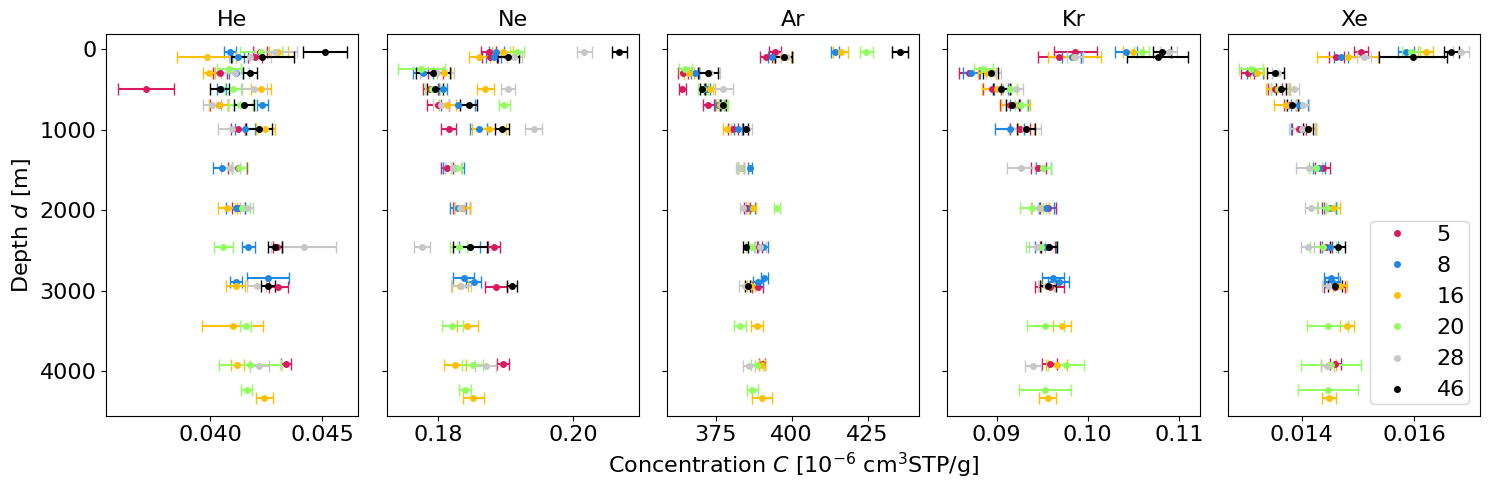

In [25]:
plotnumbers = len(noblegases)
fig, ax = plt.subplots(2, plotnumbers, sharey=True)
fig.set_size_inches(3*plotnumbers, 2*5)

for n in range(plotnumbers):
    gas = noblegases[n]
    for i in range(len(vacao_data)):
        ax[0,n].errorbar(vacao_data[gas][i]*1e6, vacao_data['Depth'][i], xerr = vacao_data[gas + ' err'][i]*1e6, 
                       marker = 'o', color = vacao_colors[vacao_data['Station'][i]], ms = 4, capsize = 4)
        ax[0,n].set_title(gas, fontsize = 16)
        ax[0,n].tick_params(axis='both', which='major', labelsize=16)
        ax[1,n].errorbar((vacao_data[gas + ' sat'][i]-1), vacao_data['Depth'][i], xerr = vacao_data[gas + ' sat err'][i], 
                       marker = 'o', color = vacao_colors[vacao_data['Station'][i]], ms = 4, capsize = 4)
        ax[1,n].tick_params(axis='both', which='major', labelsize=16)
        ax[1,n].axvline(0, color = 'grey', zorder=-10)
ax[0,0].set_ylabel('Depth $d$ [m]', fontsize = 16)
ax[0,2].set_xlabel('Concentration $C$ [$10^{-6}$ cm$^3$STP/g]', fontsize = 16)
ax[1,0].set_ylabel('Depth $d$ [m]', fontsize = 16)
ax[1,2].set_xlabel('Saturation Anomaly $\\Delta$ [%]', fontsize = 16)
ax[1,4].legend([Line2D([0], [0], marker="o", ms = 4, color=vacao_colors[s], linewidth=0) for s in vacao_colors.keys()],vacao_colors.keys(), fontsize = 16, borderpad = 0.18, handlelength=0.8, handletextpad=0.5)

# ticks
ax[0,1].set_xticks([0.18, 0.19, 0.20])
ax[0,4].set_xticks([0.013, 0.015, 0.017])
ax[1,0].set_xticks([-10, 0, 10])
ax[1,1].set_xticks([-5, 0, 5, 10])
ax[1,2].set_xticks([-5, -2.5, 0, 2.5, 5])
ax[1,2].set_xticklabels(['−5', '−2.5', '0', '2.5', '5'])
ax[1,3].set_xticks([-5, 0, 5, 10])
ax[1,4].set_xticks([-10, -5, 0, 5])


plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('plots/paper/VACAO_data.pdf', dpi = 900)

fig, ax = plt.subplots(1, plotnumbers, sharey=True)
fig.set_size_inches(3*plotnumbers, 5)
for n in range(plotnumbers):
    gas = noblegases[n]
    for i in range(len(vacao_data)):
        ax[n].errorbar(vacao_data[gas][i]*1e6, vacao_data['Depth'][i], xerr = vacao_data[gas + ' err'][i]*1e6, 
                       marker = 'o', color = vacao_colors[vacao_data['Station'][i]], ms = 4, capsize = 4)
        ax[n].set_title(gas, fontsize = 16)
        ax[n].tick_params(axis='both', which='major', labelsize=16)
ax[0].set_ylabel('Depth $d$ [m]', fontsize = 16)
ax[2].set_xlabel('Concentration $C$ [$10^{-6}$ cm$^3$STP/g]', fontsize = 16)
ax[4].legend([Line2D([0], [0], marker="o", ms = 4, color=vacao_colors[s], linewidth=0) for s in vacao_colors.keys()],vacao_colors.keys(), fontsize = 16, borderpad = 0.18)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('VACAO_data_concs.svg', dpi = 900)

### Tracer-Tracer Plot

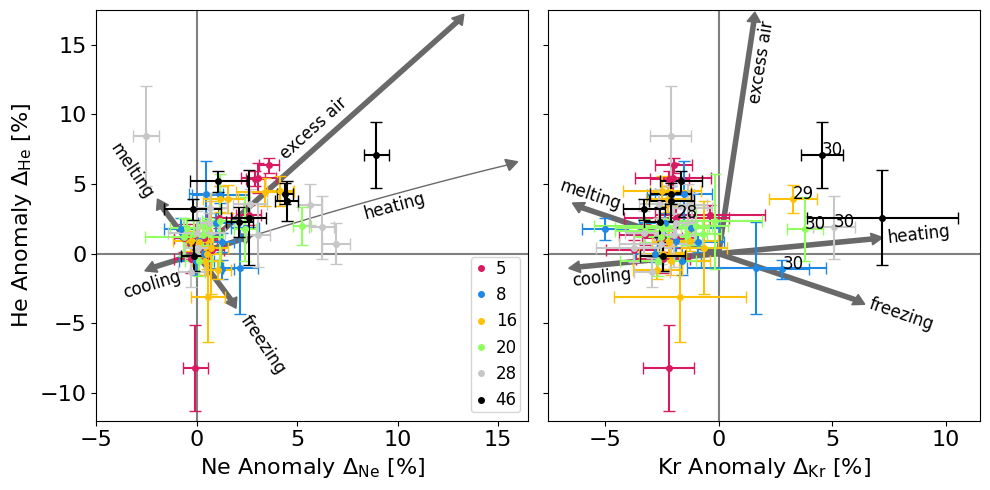

In [26]:
fig, ax = plt.subplots(1, 2, sharey='row')
fig.set_size_inches(10, 5)
txtsize = 12

gases = ['Ne', 'Kr']

## bounds
ax[0].set_xlim(-5, 16.5)
ax[1].set_xlim(-7.5, 11.5)
ax[0].set_ylim(-12, 17.5)

def arrowhead(x, y, xprev, yprev, d, c, ax):
    dx, dy = x - xprev, y - yprev
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    w, h = bbox.width, bbox.height
    sc = (ax.get_ylim()[1] - ax.get_ylim()[0]) / (ax.get_xlim()[1] - ax.get_xlim()[0]) * w / h
    basew = 0.6
    
    cbase = [x, y]
    c1 = [x + d*np.cos(np.arctan2(dy, dx))/sc, y + d*np.sin(np.arctan2(dy, dx))]
    c2 = [cbase[0] + basew*d*np.cos(np.arctan2(-dx, dy))/sc, cbase[1] + basew*d*np.sin(np.arctan2(-dx, dy))]
    c3 = [cbase[0] - basew*d*np.cos(np.arctan2(-dx, dy))/sc, cbase[1] - basew*d*np.sin(np.arctan2(-dx, dy))]
    tri = plt.Polygon([c1, c2, c3], color=c)
    ax.add_patch(tri)

for n in range(2):
    for i in range(len(vacao_data)):
        ## plotting
        x = (vacao_data[gases[n]+' sat'][i])
        y = (vacao_data['He sat'][i])
        station = vacao_data['Station'][i]
        ax[n].errorbar(x, y, 
                        xerr=vacao_data[gases[n]+' sat err'][i], yerr=vacao_data['He sat err'][i],
                        marker = 'o', color = vacao_colors[station], ms = 4, capsize=4)
        ## annotating
        d = round(vacao_data['Depth'][i])
        if n==1:    # <- remove to annotate left plot as well
            if np.isclose(d,30,atol=3):
                ax[n].annotate(d,(x,y), size = txtsize)
            elif (station==46) and ((d == 1500) or (d==2000) or (d==3301) or np.isclose(d,1000, atol=10)):
                ax[n].annotate(d,(x,y), size = txtsize)
            elif (station==16) and ((d==100) or (d==1000)):
                ax[n].annotate(d,(x,y), size = txtsize)
            elif (station==20) and (d==2000):
                ax[n].annotate(d,(x,y), size = txtsize)
    ## plotting lines
    eqtemp = 0
    ####### excess air
    A = np.arange(0,0.0013,0.00001) #excess air parameter in cm3/g
    abn = pco.ABUNDANCES
    AnomEA = A*abn[gases[n]]/pga.calc_Ceq(gas = gases[n],T=eqtemp,S=35, p=1)*100
    HeAnomEA = A*abn['He']/pga.calc_Ceq(gas = 'He',T=eqtemp,S=35, p=1)*100
    ax[n].plot(AnomEA, HeAnomEA, lw=4, color = 'dimgrey', zorder = -1)
    arrowhead(AnomEA[-1], HeAnomEA[-1], AnomEA[-2], HeAnomEA[-2], 0.7, 'dimgrey', ax[n])
    ####### ice fractionation
    f = np.arange(0.9, 1.1, 0.001) #remaining water fraction
    ice = pco.ICE_FRACTIONATION_COEFFS
    #AnomIF = 1/(f+ice[gases[n]]*(1-f))*100-100     #different parameterization, doesn't matter much
    #HeAnomIF = 1/(f+ice['He']*(1-f))*100-100
    #ax[n].plot(AnomIF, HeAnomIF, ls = '--', lw=6, color = 'dimgrey', zorder = -1)
    AnomIF = (1-(1-f)*(1-ice[gases[n]]))*100-100   #chosen parameterization: Taylor Swift
    HeAnomIF = (1-(1-f)*(1-ice['He']))*100-100
    ax[n].plot(AnomIF, HeAnomIF, lw=4, color = 'dimgrey', zorder = -1)
    arrowhead(AnomIF[-1], HeAnomIF[-1], AnomIF[-2], HeAnomIF[-2], 0.7, 'dimgrey', ax[n])
    arrowhead(AnomIF[0], HeAnomIF[0], AnomIF[1], HeAnomIF[1], 0.7, 'dimgrey', ax[n])
    ####### cooling
    Tin = np.arange(-2,3)
    AnomCL = []
    HeAnomCL = []
    AnomNe_unrealistic = []
    AnomHe_unrealistic = []
    T_meas_unrealistic = np.arange(0,15)
    for T in Tin:
        AnomCL.append((pga.calc_Ceq(gas=gases[n],T=T, S=35, p=1)/pga.calc_Ceq(gas=gases[n],T=eqtemp, S=35, p=1) -1)*100)
        HeAnomCL.append((pga.calc_Ceq('He',T, 35, 1)/pga.calc_Ceq('He',eqtemp, 35, 1) -1)*100)
    if gases[n] == 'Ne': #unrealistic heating for neon
        for T_u in T_meas_unrealistic:
            AnomNe_unrealistic.append((pga.calc_Ceq(gas=gases[n],T=-2, S=35, p=1)/pga.calc_Ceq(gas=gases[n],T=T_u, S=35, p=1) -1)*100)
            AnomHe_unrealistic.append((pga.calc_Ceq('He',-2, 35, 1)/pga.calc_Ceq('He',T_u, 35, 1) -1)*100)
    ax[n].plot(AnomCL, HeAnomCL, lw=4, color = 'dimgrey', zorder = -1)
    arrowhead(AnomCL[-1], HeAnomCL[-1], AnomCL[-2], HeAnomCL[-2], 0.7, 'dimgrey', ax[n])
    arrowhead(AnomCL[0], HeAnomCL[0], AnomCL[1], HeAnomCL[1], 0.7, 'dimgrey', ax[n])
    if n==0:
        ax[0].plot(AnomNe_unrealistic, AnomHe_unrealistic, lw=1, color = 'dimgrey', zorder = -1)
        arrowhead(AnomNe_unrealistic[-1], AnomHe_unrealistic[-1], AnomNe_unrealistic[-2], AnomHe_unrealistic[-2], 0.7, 'dimgrey', ax[0])
    ## formatting subplots 
    ax[n].axvline(0, color = 'grey', zorder=-20)
    ax[n].axhline(0, color = 'grey', zorder=-20)
    ax[n].tick_params(axis='both', which='major', labelsize=16)
    ax[n].set_xlabel('{0} Anomaly $\\Delta_\\text{{{0}}}$ [%]'.format(gases[n]), fontsize =16)
## annotations
ax[0].text(-3.8,-3.2,'cooling',rotation=17, size = txtsize)
ax[0].text(8.2,2.5,'heating',rotation=15, size = txtsize)
ax[1].text(-6.5,-2.3,'cooling',rotation=6.3, size = txtsize)
ax[1].text(7.4,0.8,'heating',rotation=6.3, size = txtsize)
ax[0].text(2,-8.6,'freezing',rotation=-56, size = txtsize)
ax[0].text(-4.5,4,'melting',rotation=-56, size = txtsize)
ax[1].text(6.5,-5.5,'freezing',rotation=-19, size = txtsize)
ax[1].text(-7.1,3.2,'melting',rotation=-18, size = txtsize)
ax[0].text(4,6.8,'excess air',rotation=42, size = txtsize)
ax[1].text(1.2,11,'excess air',rotation=81, size = txtsize)
## general format
ax[0].set_ylabel('He Anomaly $\\Delta_\\text{He}$ [%]', fontsize =16) 
ax[0].legend([Line2D([0], [0], marker="o", ms = 4, color=vacao_colors[s], linewidth=0) for s in vacao_colors.keys()],vacao_colors.keys(), fontsize = txtsize, loc='lower right',
             ncol=1, borderpad = 0.18, handlelength=0.8, handletextpad=0.5) 

fig.tight_layout()
plt.savefig('plots/paper/Tracer-Tracer_Plot.pdf', dpi =900,bbox_inches='tight')

### Model results

In [27]:
# load in results from previous work w/ MC errors
# these are the adjusted results, i.e. with datapoints we deem to be contaminated/malfunctions removed
FitTaylorSWIF = pd.read_csv('data/Comparison_Results_TaylorSWIF_adjusted.csv').set_index('Sample_idx')
FitTaylorSWIFT = pd.read_csv('data/Comparison_Results_TaylorSWIFT_adjusted.csv').set_index('Sample_idx')
FitDWARF = pd.read_csv('data/Comparison_Results_DWARF_adjusted.csv').sort_values('Sample_idx').set_index('Sample_idx')
FitQSDWARF = pd.read_csv('data/Comparison_Results_QSDWARF_adjusted.csv').sort_values('Sample_idx').set_index('Sample_idx')

# create red chi2 columns
chi2eval_TaylorSWIF = pd.read_csv('data/chi2_evaluation_TaylorSWIF_new.csv').set_index('Sample_idx')
chi2eval_TaylorSWIFT = pd.read_csv('data/chi2_evaluation_TaylorSWIFT_new.csv').set_index('Sample_idx')
chi2eval_DWARF = pd.read_csv('data/chi2_evaluation_DWARF_new.csv').set_index('Sample_idx')
chi2eval_QSDWARF = pd.read_csv('data/chi2_evaluation_QSDWARF_new.csv').set_index('Sample_idx')

FitTaylorSWIF['red chi2'] = chi2eval_TaylorSWIF['chi2_reduced']
FitTaylorSWIFT['red chi2'] = chi2eval_TaylorSWIFT['chi2_reduced']
FitDWARF['red chi2'] = chi2eval_DWARF['chi2_reduced']
FitQSDWARF['red chi2'] = chi2eval_QSDWARF['chi2_reduced']
FitDic = {0:FitTaylorSWIF, 1:FitTaylorSWIFT, 2:FitDWARF, 3:FitQSDWARF}

# remove samples with bad chi2 values (chi2 > 9.210)
if False:  # Change to False to keep all samples
    FitDic = {0:FitTaylorSWIF[FitTaylorSWIF['red chi2'] < 9.210].reset_index(), 
            1:FitTaylorSWIFT[FitTaylorSWIFT['red chi2'] < 9.210].reset_index(), 
            2:FitDWARF[FitDWARF['red chi2'] < 9.210].reset_index(), 
            3:FitQSDWARF[FitQSDWARF['red chi2'] < 9.210].reset_index()}

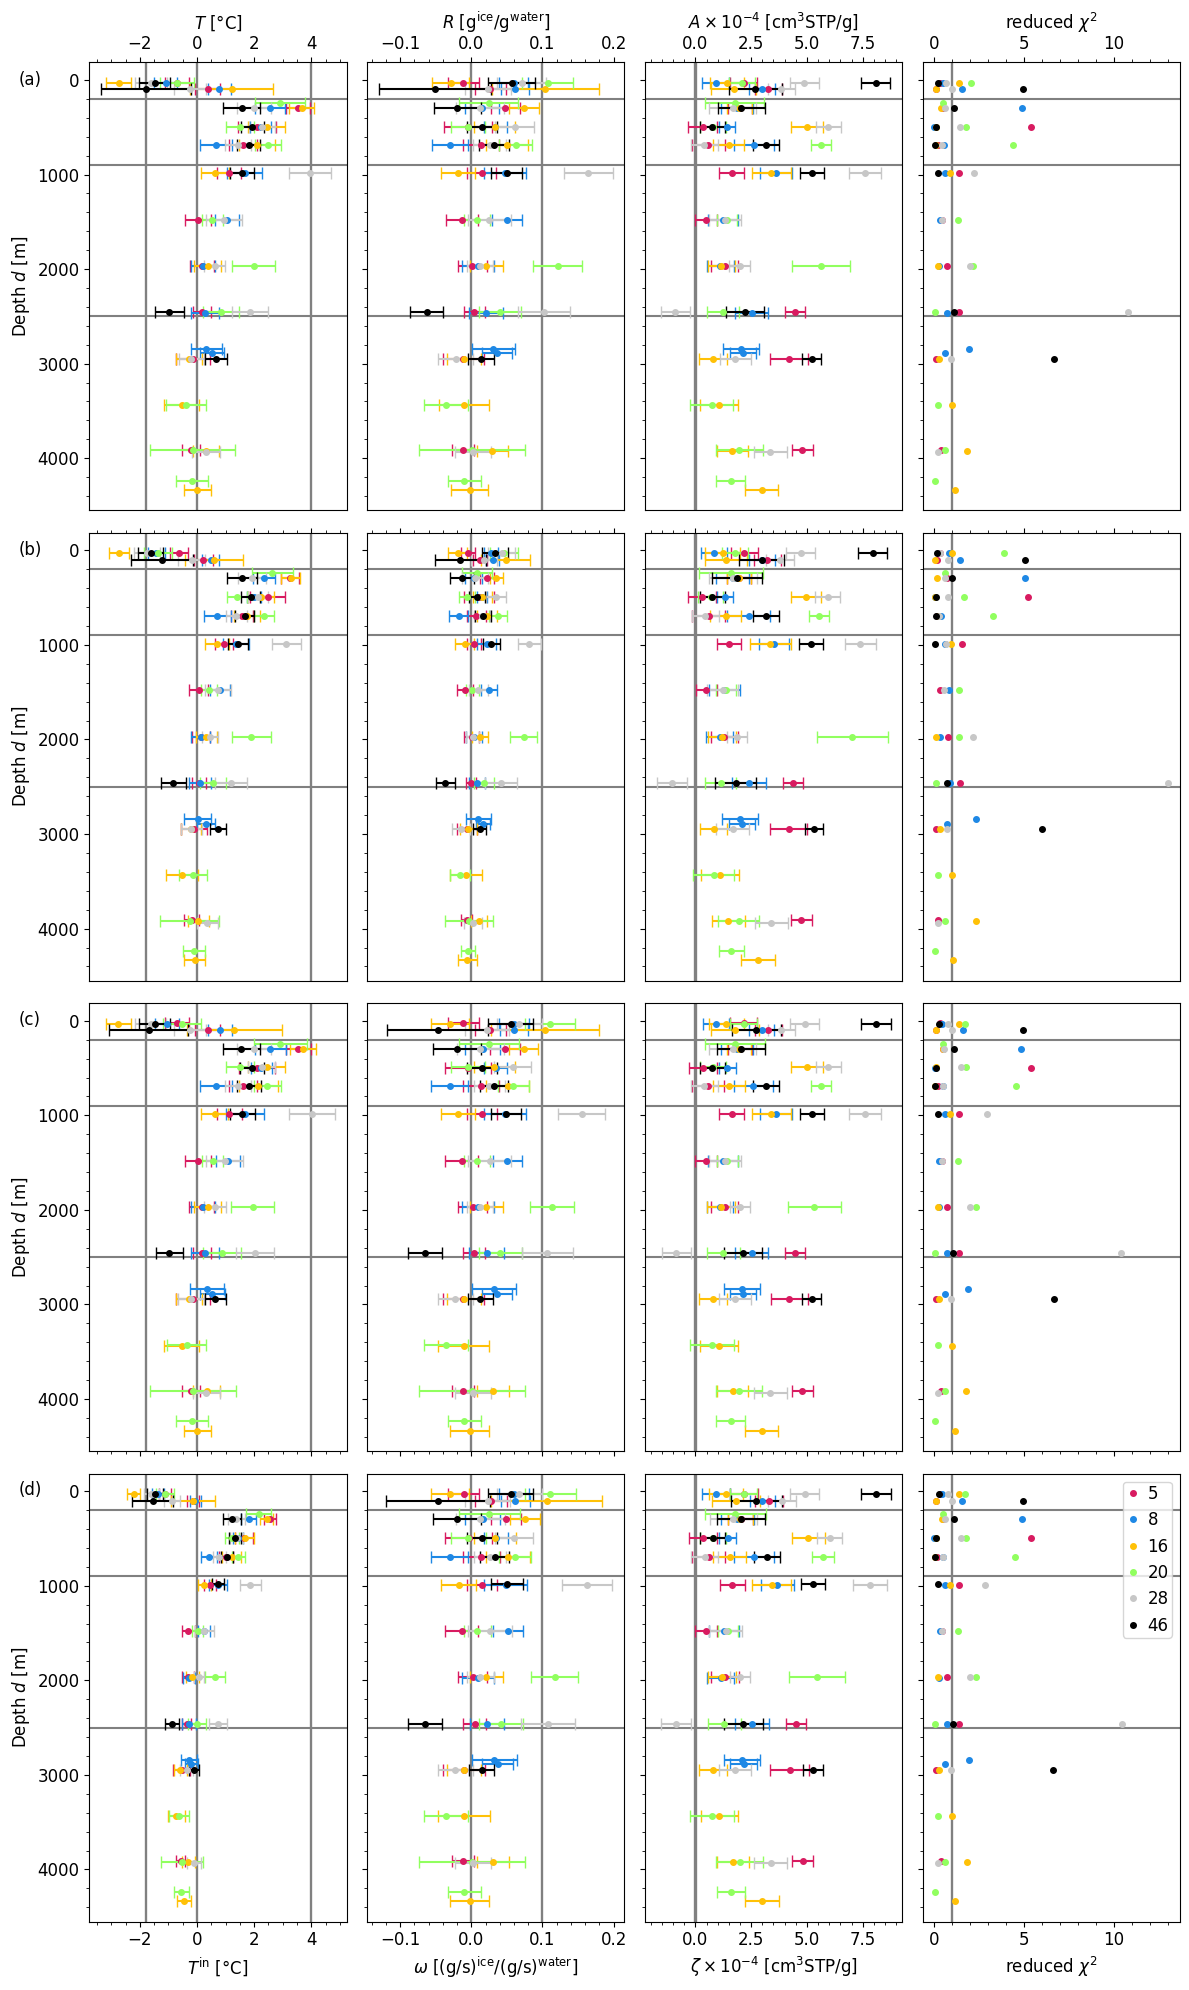

In [28]:
fig, ax = plt.subplots(4, 4, sharey='row', sharex='col')
fig.set_size_inches(3*4, 5*4)
txtsize=12

static_params = ['T_r', 'R', 'A']
dynamic_params = ['T_r', 'omega', 'zeta']
static_params+=['red chi2']
dynamic_params+=['red chi2']
paramDic = {0:['$T$ [°C]', '$R$ [g$^\\text{ice}$/g$^\\text{water}$]', '$A\\times 10^{-4}$ [cm$^3$STP/g]', 'reduced $\\chi^2$'], #labels for axes
            1:['$T^{\\text{in}}$ [°C]', '$\\omega$ [(g/s)$^\\text{ice}$/(g/s)$^\\text{water}$]', '$\\zeta\\times 10^{-4}$ [cm$^3$STP/g]','reduced $\\chi^2$']}


#for i in range(len(vacao_data)):
for n in range(4):#2 models per type (2static and 2 dynamic models)
    for pa in range(4): #3 Parameter
        for i in range(len(FitDic[n])): #all data points(depth, station)
            parsnames = static_params if n < 2 else dynamic_params
            if pa<3: #parameters
                if pa==2:
                    ax[n,pa].errorbar(FitDic[n]['Classical ' + parsnames[pa]][i]*1e4, FitDic[n]['Depth'][i], xerr = FitDic[n]['MC ' + parsnames[pa] + ' std'][i]*1e4,
                             marker = 'o', color = vacao_colors[FitDic[n]['Station'][i]], ms = 4, capsize = 4)
                else:
                    ax[n,pa].errorbar(FitDic[n]['Classical ' + parsnames[pa]][i], FitDic[n]['Depth'][i], xerr = FitDic[n]['MC ' + parsnames[pa] + ' std'][i],
                                marker = 'o', color = vacao_colors[FitDic[n]['Station'][i]], ms = 4, capsize = 4)
            else: #fit statistic
                ax[n,pa].scatter(FitDic[n][parsnames[pa]][i], FitDic[n]['Depth'][i],
                             marker = 'o', color = vacao_colors[FitDic[n]['Station'][i]], s = 4**2)

        if n < 2: #static models
            ax[n,pa].xaxis.tick_top()
            # horizontal layer lines
            ax[n,pa].xaxis.set_minor_locator(AutoMinorLocator()) #minor ticks
            ax[n,pa].yaxis.set_minor_locator(AutoMinorLocator()) #minor ticks
            ax[n,pa].axhline(200, color = 'grey', zorder = -1)
            ax[n,pa].axhline(900, color = 'grey', zorder = -1)
            ax[n,pa].axhline(2500, color = 'grey', zorder = -1)
            ax[n,pa].tick_params(axis='both', which='major', labelsize=txtsize)
            ax[n,0].set_ylabel('Depth $d$ [m]', fontsize = txtsize)
            ax[n,0].axvline(-1.8, color = 'grey', zorder = -1)
            ax[n,0].axvline(0, color = 'grey', zorder = -1)
            ax[n,0].axvline(4, color = 'grey', zorder = -1)
            ax[n,1].axvline(0, color = 'grey', zorder = -1)
            ax[n,1].axvline(0.1, color = 'grey', zorder = -1)
            ax[n,2].axvline(0, color = 'grey', zorder = -1)
            ax[n,2].axvline(0.001, color = 'grey', zorder = -1)
            ax[n,3].axvline(1, color = 'grey', zorder = -1)
        else: #dynamic models
            ax[n,pa].yaxis.set_minor_locator(AutoMinorLocator()) #minor ticks
            #horizontal layer lines
            ax[n,pa].axhline(200, color = 'grey', zorder = -1)
            ax[n,pa].axhline(900, color = 'grey', zorder = -1)
            ax[n,pa].axhline(2500, color = 'grey', zorder = -1)
            ax[n,pa].tick_params(axis='both', which='major', labelsize=txtsize)
            ax[n,0].set_ylabel('Depth $d$ [m]', fontsize = txtsize)
            #gridlines
            ax[n,0].axvline(-1.8, color = 'grey', zorder = -1)
            ax[n,0].axvline(0, color = 'grey', zorder = -1)
            ax[n,0].axvline(4, color = 'grey', zorder = -1)
            ax[n,1].axvline(0, color = 'grey', zorder = -1)
            ax[n,1].axvline(0.1, color = 'grey', zorder = -1)
            ax[n,2].axvline(0, color = 'grey', zorder = -1)
            ax[n,2].axvline(0.001, color = 'grey', zorder = -1)
            ax[n,3].axvline(1, color = 'grey', zorder = -1)
        
        ax[0,pa].xaxis.set_ticks_position('top')
        ax[0,pa].set_xlabel(paramDic[0][pa], fontsize = txtsize)
        ax[0,pa].xaxis.set_label_position('top') 
        #ax[2*(n+1)-1,pa].xaxis.set_tick_params(labelbottom=True)
        ax[3,pa].set_xlabel(paramDic[1][pa], fontsize = txtsize)
    ax[n, 0].invert_yaxis()
        
ax[3,3].legend([Line2D([0], [0], marker="o", ms = 4, color=vacao_colors[s], linewidth=0) for s in vacao_colors.keys()],vacao_colors.keys(), fontsize = txtsize, ncol=1, borderpad = 0.18, handlelength=0.8, handletextpad=0.5, loc='upper right')
#ax[0,1].set_title('Taylor SWIF', fontsize = txtsize)
#ax[1,1].set_title('Taylor SWIFT', fontsize = txtsize)
#ax[2,1].set_title('DWARF', fontsize = txtsize)
#ax[3,1].set_title('QS-DWARF', fontsize = txtsize)
plt.figtext(0.02, 0.955, '(a)', fontsize=txtsize) #instead of titles now numbers
plt.figtext(0.02, 0.72, '(b)', fontsize=txtsize)
plt.figtext(0.02, 0.485, '(c)', fontsize=txtsize)
plt.figtext(0.02, 0.25, '(d)', fontsize=txtsize)
fig.tight_layout()
plt.subplots_adjust(wspace=0.08, 
                    hspace=0.05)

plt.savefig('plots/paper/ModelResults_adjusted.pdf', dpi = 900)

### Predictions

In [29]:
SF6results = pd.read_csv('data/SF6_Results_new.csv')
CFC12results = pd.read_csv('data/CFC12_Results_new.csv')

SF6means = SF6results[['TaylorSWIF', 'TaylorSWIFT', 'DWARF', 'QSDWARF']].mean(axis=1)*100
SF6meanerrs = SF6results[['TaylorSWIF err', 'TaylorSWIFT err', 'DWARF err', 'QSDWARF err']].apply(lambda x: np.sqrt(np.sum(x**2))/4, axis=1)*100
CFC12means = CFC12results[['TaylorSWIF', 'TaylorSWIFT', 'DWARF', 'QSDWARF']].mean(axis=1)*100
CFC12meanerrs = CFC12results[['TaylorSWIF err', 'TaylorSWIFT err', 'DWARF err', 'QSDWARF err']].apply(lambda x:  np.sqrt(np.sum(x**2))/4, axis=1)*100

ignore = [0, 14]  # ignore these samples in the surface mean calculation; 0, 14 corresponds to S5 and S16

# surf mean (.drop(ignore) to skip unwanted stations)
SF6surfmean = SF6means[SF6results['Depth'] < 50].drop(ignore).mean()
CFC12surfmean = CFC12means[CFC12results['Depth'] < 50].drop(ignore).mean()

# deep mean
SF6deepmean = SF6means[SF6results['Depth'] > 170].mean()
CFC12deepmean = CFC12means[CFC12results['Depth'] > 170].mean()

# surf standard deviation (.drop(ignore) to skip unwanted stations)
SF6surfstdev = SF6means[SF6results['Depth'] < 50].drop(ignore).std(ddof=1)
CFC12surfstdev = CFC12means[CFC12results['Depth'] < 50].drop(ignore).std(ddof=1)

# deep standard deviation
SF6deepstdev = SF6means[SF6results['Depth'] > 170].std(ddof=1)
CFC12deepstdev = CFC12means[CFC12results['Depth'] > 170].std(ddof=1)

# surf average error (.drop(ignore) to skip unwanted stations)
SF6surfavgerr = (np.sum(SF6meanerrs[SF6results['Depth'] < 50].drop(ignore)))/len(SF6meanerrs[SF6results['Depth'] < 50].drop(ignore))
CFC12surfavgerr = (np.sum(CFC12meanerrs[CFC12results['Depth'] < 50].drop(ignore)))/len(CFC12meanerrs[CFC12results['Depth'] < 50].drop(ignore))

# deep average error
SF6deepavgerr = (np.sum(SF6meanerrs[SF6results['Depth'] > 170]))/len(SF6meanerrs[SF6results['Depth'] > 170])
CFC12deepavgerr = (np.sum(CFC12meanerrs[CFC12results['Depth'] > 170]))/len(CFC12meanerrs[CFC12results['Depth'] > 170])

print(SF6surfmean, SF6deepmean, CFC12surfmean, CFC12deepmean)
print(SF6surfstdev, SF6deepstdev, CFC12surfstdev, CFC12deepstdev)
print(SF6surfavgerr, SF6deepavgerr, CFC12surfavgerr, CFC12deepavgerr)

# Create a 3D dataframe with axes: ['SF6', 'CFC12'], ['surf', 'deep'], ['mean', 'stdev', 'avgerr']
tt_data = pd.DataFrame(index=['mean', 'stdev', 'avgerr'], columns=pd.MultiIndex.from_product([['SF6', 'CFC12'], ['surf', 'deep']]))
tt_data.loc['mean', ('SF6', 'surf')] = SF6surfmean
tt_data.loc['mean', ('SF6', 'deep')] = SF6deepmean
tt_data.loc['mean', ('CFC12', 'surf')] = CFC12surfmean
tt_data.loc['mean', ('CFC12', 'deep')] = CFC12deepmean
tt_data.loc['stdev', ('SF6', 'surf')] = SF6surfstdev
tt_data.loc['stdev', ('SF6', 'deep')] = SF6deepstdev
tt_data.loc['stdev', ('CFC12', 'surf')] = CFC12surfstdev
tt_data.loc['stdev', ('CFC12', 'deep')] = CFC12deepstdev
tt_data.loc['avgerr', ('SF6', 'surf')] = SF6surfavgerr
tt_data.loc['avgerr', ('SF6', 'deep')] = SF6deepavgerr
tt_data.loc['avgerr', ('CFC12', 'surf')] = CFC12surfavgerr
tt_data.loc['avgerr', ('CFC12', 'deep')] = CFC12deepavgerr

X = pd.DataFrame({'Station':SF6results['Station'], 'Depth':SF6results['Depth'], 'SF6':SF6means, 'SF6 err':SF6meanerrs, 'CFC12':CFC12means, 'CFC12 err':CFC12meanerrs})
X.to_csv('data/Model-Averaged Transient Tracer Saturations.csv')

9.147916395705098 -1.3174877449196785 4.948274358586302 -5.00973203627166
4.47785705928291 2.2688770698314706 2.1813494491966283 0.8744081074393178
2.0562903739976033 1.6778854563725947 2.1756569971260364 1.766791956231187


Surface mean SF6: 9.147916395705098
Surface stdv SF6: 4.47785705928291
Surface aerr SF6: 2.0562903739976033
Deep mean SF6: -1.3174877449196785
Deep stdv SF6: 2.2688770698314706
Deep aerr SF6: 1.6778854563725947
Surface mean CFC12: 4.948274358586302
Surface stdv CFC12: 2.1813494491966283
Surface aerr CFC12: 2.1756569971260364
Deep mean CFC12: -5.00973203627166
Deep stdv CFC12: 0.8744081074393178
Deep aerr CFC12: 1.766791956231187


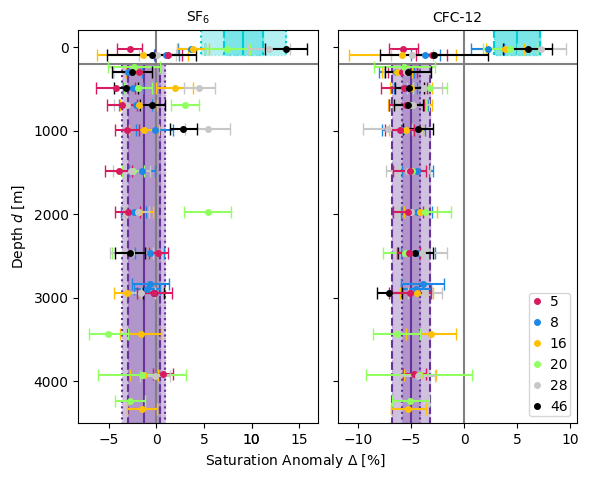

In [30]:
fig, ax = plt.subplots(1, 2, sharey='row')
fig.set_size_inches(3*2, 5)
txtsize=10
meanmarkers = {'mean':'solid', 'avgerr':'--', 'std':':'} #mean, average error, std
meancolors = {'surf':'darkturquoise', 'deep':'rebeccapurple'} #colors for surface and deepwater

tt = ['SF6', 'CFC12']
tt_lab = ['SF$_6$', 'CFC-12']

for k in range(len(tt)):

    ax[k].set_title(tt_lab[k], fontsize = txtsize)
    ax[k].tick_params(axis='both', which='major', labelsize=txtsize)
    ax[k].axvline(0, color = 'grey')
    ax[k].axhline(200, color='grey')

    for i in range(len(SF6results)):
        station = SF6results['Station'][i]
        depth = SF6results['Depth'][i]
        if k == 0: #SF6
            ax[k].errorbar(SF6means[i], depth, xerr = SF6meanerrs[i],
                           marker = 'o', color = vacao_colors[station], ms = 4, capsize = 4)
        else: #CFC12
            ax[k].errorbar(CFC12means[i], depth, xerr = CFC12meanerrs[i],
                           marker = 'o', color = vacao_colors[station], ms = 4, capsize = 4)

    # surface means, errs and stdevs
    g = tt[k]
    for d in ['surf', 'deep']:
        mean, avgerr, stdev = tt_data.loc['mean', (g, d)], tt_data.loc['avgerr', (g, d)], tt_data.loc['stdev', (g, d)]

        lefterr, righterr = mean - avgerr, mean + avgerr
        leftstd, rightstd = mean - stdev, mean + stdev

        # lines
        lowerlim={'surf':-200, 'deep':200}[d]
        upperlim={'surf':100, 'deep':4500}[d]
        ax[k].vlines(mean, ymin=lowerlim, ymax=upperlim, color=meancolors[d], linestyle=meanmarkers['mean'], zorder=-5, )
        ax[k].vlines(lefterr, ymin=lowerlim, ymax=upperlim, color=meancolors[d], linestyle=meanmarkers['avgerr'], zorder=-5)
        ax[k].vlines(righterr, ymin=lowerlim, ymax=upperlim, color=meancolors[d], linestyle=meanmarkers['avgerr'], zorder=-5)
        ax[k].vlines(leftstd, ymin=lowerlim, ymax=upperlim, color=meancolors[d], linestyle=meanmarkers['std'], zorder=-5)
        ax[k].vlines(rightstd, ymin=lowerlim, ymax=upperlim, color=meancolors[d], linestyle=meanmarkers['std'], zorder=-5)

        # patches between lines
        ax[k].add_patch(plt.Rectangle((lefterr, lowerlim), righterr-lefterr, upperlim-lowerlim,
                                        color=meancolors[d], alpha=0.3, linestyle=meanmarkers['avgerr'], zorder=-10))
        ax[k].add_patch(plt.Rectangle((leftstd, lowerlim), rightstd-leftstd, upperlim-lowerlim,
                                        color=meancolors[d], alpha=0.3, linestyle=meanmarkers['std'], zorder=-10))

fig.supxlabel('Saturation Anomaly $\\Delta$ [%]', fontsize = txtsize, y=0.05)
ax[0].set_ylim(-200, 4500)
ax[0].set_ylabel('Depth $d$ [m]', fontsize = txtsize)
ax[0].invert_yaxis()
ax[0].set_xticks([-5, 0, 5, 10, 10, 15])
ax[1].legend([Line2D([0], [0], marker="o", ms = 4, color=vacao_colors[s], linewidth=0) for s in vacao_colors.keys()],vacao_colors.keys(),fontsize = txtsize, ncol=1, borderpad = 0.18, handlelength=0.8, handletextpad=0.5)
plt.tight_layout()
plt.savefig('plots/paper/Predictions_new.pdf', dpi = 900)

print('Surface mean SF6:', SF6surfmean)
print('Surface stdv SF6:', SF6surfstdev)
print('Surface aerr SF6:', SF6surfavgerr)
print('Deep mean SF6:', SF6deepmean)
print('Deep stdv SF6:', SF6deepstdev)
print('Deep aerr SF6:', SF6deepavgerr)
print('Surface mean CFC12:', CFC12surfmean)
print('Surface stdv CFC12:', CFC12surfstdev)
print('Surface aerr CFC12:', CFC12surfavgerr)
print('Deep mean CFC12:', CFC12deepmean)
print('Deep stdv CFC12:', CFC12deepstdev)
print('Deep aerr CFC12:', CFC12deepavgerr)

# Averages

In [31]:
#averages for table 2
for i in range(4):
    # assign depth bins
    FitDic[i]['Depth bin'] = pd.cut(FitDic[i]['Depth'], bins=[0, 50, 190, 910, 2450, 6000], labels=['S', 'NA', 'A', 'NA', 'D'], ordered=False)
    FitDic[i].loc[0, 'Depth bin'], FitDic[0].loc[22, 'Depth bin'] = 'NA', 'NA'    # <- remove S5 & S16 depth 30 for averaging
    # calculate means and stds for each depth bin
    avg = FitDic[i].groupby('Depth bin').mean().drop('NA')
    std = FitDic[i].groupby('Depth bin').std().drop('NA')
    # *1e4 for easier readability in table
    if i < 2:
        avg['Classical A'] = avg['Classical A'] * 1e4
        std['Classical A'] = std['Classical A'] * 1e4
    else:
        avg['Classical zeta'] = avg['Classical zeta'] * 1e4
        std['Classical zeta'] = std['Classical zeta'] * 1e4
    # change order to S A D
    avg = avg.reindex(['S', 'A', 'D'])
    print(f"Model {['TaylorSWIF', 'TaylorSWIFT', 'DWARF', 'QS-DWARF'][i]}:")
    if i < 2:
        for col in ['T_r', 'R', 'A']:
            avg['std ' + col] = std['Classical ' + col]
        display(avg[['Classical T_r', 'std T_r', 'Classical A', 'std A', 'Classical R', 'std R']])
        print('\n')
    else:
        for col in ['T_r', 'omega', 'zeta']:
            avg['std ' + col] = std['Classical ' + col]
        display(avg[['Classical T_r', 'std T_r', 'Classical zeta', 'std zeta', 'Classical omega', 'std omega']])
        print('\n')



Model TaylorSWIF:


C:\Users\scopi\AppData\Local\Temp\ipykernel_3816\176726888.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = FitDic[i].groupby('Depth bin').mean().drop('NA')
C:\Users\scopi\AppData\Local\Temp\ipykernel_3816\176726888.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std = FitDic[i].groupby('Depth bin').std().drop('NA')


,Classical T_r,std T_r,Classical A,std A,Classical R,std R
Depth bin,,,,,,
S,-1.224908,0.407485,3.990225,3.199812,0.073612,0.023198
A,2.153070,0.732780,2.189169,1.721713,0.024509,0.028348
D,0.117925,0.604482,2.305878,1.558420,0.005520,0.034664




Model TaylorSWIFT:


C:\Users\scopi\AppData\Local\Temp\ipykernel_3816\176726888.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = FitDic[i].groupby('Depth bin').mean().drop('NA')
C:\Users\scopi\AppData\Local\Temp\ipykernel_3816\176726888.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std = FitDic[i].groupby('Depth bin').std().drop('NA')


,Classical T_r,std T_r,Classical A,std A,Classical R,std R
Depth bin,,,,,,
S,-1.778981,0.556263,3.299787,3.016791,0.025899,0.026269
A,2.029824,0.646968,2.117031,1.714563,0.012161,0.015265
D,0.039248,0.452010,2.241236,1.580065,0.000753,0.016211




Model DWARF:


C:\Users\scopi\AppData\Local\Temp\ipykernel_3816\176726888.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = FitDic[i].groupby('Depth bin').mean().drop('NA')
C:\Users\scopi\AppData\Local\Temp\ipykernel_3816\176726888.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std = FitDic[i].groupby('Depth bin').std().drop('NA')


,Classical T_r,std T_r,Classical zeta,std zeta,Classical omega,std omega
Depth bin,,,,,,
S,-1.489336,0.825779,3.492293,3.001189,0.052642,0.051442
A,2.160214,0.742750,2.188366,1.720665,0.024190,0.028004
D,0.133440,0.636529,2.306257,1.551703,0.005773,0.035733




Model QS-DWARF:


C:\Users\scopi\AppData\Local\Temp\ipykernel_3816\176726888.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = FitDic[i].groupby('Depth bin').mean().drop('NA')
C:\Users\scopi\AppData\Local\Temp\ipykernel_3816\176726888.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std = FitDic[i].groupby('Depth bin').std().drop('NA')


,Classical T_r,std T_r,Classical zeta,std zeta,Classical omega,std omega
Depth bin,,,,,,
S,-1.558554,0.405980,3.492507,3.000514,0.052768,0.051355
A,1.452847,0.541113,2.218669,1.737854,0.024915,0.028514
D,-0.353738,0.345901,2.326273,1.563038,0.006194,0.035932


In [32]:
print('Cooling from last equilibrium to measured PT:')

print('\nmax')
print((FitDic[0][FitDic[0]['Depth']>50]['Classical T_r'] - chi2eval_TaylorSWIF['T'][chi2eval_TaylorSWIF['Depth']>50]).max())
print((FitDic[1][FitDic[1]['Depth']>50]['Classical T_r'] - chi2eval_TaylorSWIFT['T'][chi2eval_TaylorSWIFT['Depth']>50]).max())
print((FitDic[2][FitDic[2]['Depth']>50]['Classical T_r'] - chi2eval_DWARF['T'][chi2eval_DWARF['Depth']>50]).max())
print((FitDic[3][FitDic[3]['Depth']>50]['Classical T_r'] - chi2eval_QSDWARF['T'][chi2eval_QSDWARF['Depth']>50]).max())

print('\nmin')
print((FitDic[0][FitDic[0]['Depth']>50]['Classical T_r'] - chi2eval_TaylorSWIF['T'][chi2eval_TaylorSWIF['Depth']>50]).min())
print((FitDic[1][FitDic[1]['Depth']>50]['Classical T_r'] - chi2eval_TaylorSWIFT['T'][chi2eval_TaylorSWIFT['Depth']>50]).min())
print((FitDic[2][FitDic[2]['Depth']>50]['Classical T_r'] - chi2eval_DWARF['T'][chi2eval_DWARF['Depth']>50]).min())
print((FitDic[3][FitDic[3]['Depth']>50]['Classical T_r'] - chi2eval_QSDWARF['T'][chi2eval_QSDWARF['Depth']>50]).min())

print('\nmean')
print((FitDic[0][FitDic[0]['Depth']>50]['Classical T_r'] - chi2eval_TaylorSWIF['T'][chi2eval_TaylorSWIF['Depth']>50]).mean())
print((FitDic[1][FitDic[1]['Depth']>50]['Classical T_r'] - chi2eval_TaylorSWIFT['T'][chi2eval_TaylorSWIFT['Depth']>50]).mean())
print((FitDic[2][FitDic[2]['Depth']>50]['Classical T_r'] - chi2eval_DWARF['T'][chi2eval_DWARF['Depth']>50]).mean())
print((FitDic[3][FitDic[3]['Depth']>50]['Classical T_r'] - chi2eval_QSDWARF['T'][chi2eval_QSDWARF['Depth']>50]).mean())

print('\nstd')
print((FitDic[0][FitDic[0]['Depth']>50]['Classical T_r'] - chi2eval_TaylorSWIF['T'][chi2eval_TaylorSWIF['Depth']>50]).std())
print((FitDic[1][FitDic[1]['Depth']>50]['Classical T_r'] - chi2eval_TaylorSWIFT['T'][chi2eval_TaylorSWIFT['Depth']>50]).std())
print((FitDic[2][FitDic[2]['Depth']>50]['Classical T_r'] - chi2eval_DWARF['T'][chi2eval_DWARF['Depth']>50]).std())
print((FitDic[3][FitDic[3]['Depth']>50]['Classical T_r'] - chi2eval_QSDWARF['T'][chi2eval_QSDWARF['Depth']>50]).std())

Cooling from last equilibrium to measured PT:

max
4.142882907487287
3.307436688823806
4.215237015957079
2.0537385751682926

min
-0.3554949159278553
-0.04134561562882422
-0.260246509353377
-0.12969727019251787

mean
1.266337544386381
1.149952626384657
1.2801029740117222
0.6353795498506768

std
0.7289778489937521
0.5611072787217056
0.7412934813473432
0.3615043307398952


In [33]:
print('Ice fractions:')

print('\nmax')
print((FitDic[0][FitDic[0]['Depth']<50]['Classical R']).max())
print((FitDic[1][FitDic[1]['Depth']<50]['Classical R']).max())
print((FitDic[2][FitDic[2]['Depth']<50]['Classical omega']).max())
print((FitDic[3][FitDic[3]['Depth']<50]['Classical omega']).max())

print('\nmin')
print((FitDic[0][FitDic[0]['Depth']<50]['Classical R']).min())
print((FitDic[1][FitDic[1]['Depth']<50]['Classical R']).min())
print((FitDic[2][FitDic[2]['Depth']<50]['Classical omega']).min())
print((FitDic[3][FitDic[3]['Depth']<50]['Classical omega']).min())

print('\nmean')
print((FitDic[0][FitDic[0]['Depth']<50]['Classical R']).mean())
print((FitDic[1][FitDic[1]['Depth']<50]['Classical R']).mean())
print((FitDic[2][FitDic[2]['Depth']<50]['Classical omega']).mean())
print((FitDic[3][FitDic[3]['Depth']<50]['Classical omega']).mean())

print('\nstd')
print((FitDic[0][FitDic[0]['Depth']<50]['Classical R']).std())
print((FitDic[1][FitDic[1]['Depth']<50]['Classical R']).std())
print((FitDic[2][FitDic[2]['Depth']<50]['Classical omega']).std())
print((FitDic[3][FitDic[3]['Depth']<50]['Classical omega']).std())

Ice fractions:

max
0.107202259779425
0.0460130703609597
0.1111554367286727
0.1113138284010319

min
-0.0291878349634512
-0.0191494270335838
-0.030339020335352
-0.0299994052078497

mean
0.04235291768178501
0.0208424642049839
0.04202470589858901
0.04218185517321818

std
0.05196690681173737
0.02656072905162009
0.05285213153863642
0.05274654245426331


In [34]:
print('cooling at the surface')
print('\nTaylor SWIF')
print((FitDic[0][FitDic[0]['Depth']<50]['Classical T_r'] - chi2eval_TaylorSWIF['T'][chi2eval_TaylorSWIF['Depth']<50]))
print('errors')
print((FitDic[0][FitDic[0]['Depth']<50]['Classical T_r err']))
print('\nTaylor SWIFT')
print((FitDic[1][FitDic[1]['Depth']<50]['Classical T_r'] - chi2eval_TaylorSWIFT['T'][chi2eval_TaylorSWIFT['Depth']<50]))
print('errors')
print((FitDic[1][FitDic[1]['Depth']<50]['Classical T_r err']))
print('\nDWARF')
print((FitDic[2][FitDic[2]['Depth']<50]['Classical T_r'] - chi2eval_DWARF['T'][chi2eval_DWARF['Depth']<50]))
print('errors')
print((FitDic[2][FitDic[2]['Depth']<50]['Classical T_r err']))
print('\nQS-DWARF')
print((FitDic[3][FitDic[3]['Depth']<50]['Classical T_r'] - chi2eval_QSDWARF['T'][chi2eval_QSDWARF['Depth']<50]))
print('errors')
print((FitDic[3][FitDic[3]['Depth']<50]['Classical T_r err']))

cooling at the surface

Taylor SWIF
Sample_idx
0     0.844060
11    0.579485
22   -1.064185
33    0.988139
43   -0.040653
54   -0.016442
dtype: float64
errors
Sample_idx
0     0.226213
11    0.271469
22    0.534560
33    0.871152
43    0.439057
54    0.247772
Name: Classical T_r err, dtype: float64

Taylor SWIFT
Sample_idx
0     0.921114
11    0.252181
22   -1.061407
33    0.325041
43   -0.170228
54   -0.153827
dtype: float64
errors
Sample_idx
0     0.186333
11    0.269801
22    0.354682
33    0.975214
43    0.252323
54    0.163947
Name: Classical T_r err, dtype: float64

DWARF
Sample_idx
0     0.846537
11    0.618514
22   -1.075942
33    1.170766
43   -0.055863
54   -0.017489
dtype: float64
errors
Sample_idx
0     0.224287
11    0.281432
22    0.518285
33    0.841408
43    0.473002
54    0.265342
Name: Classical T_r err, dtype: float64

QS-DWARF
Sample_idx
0     0.425712
11    0.304456
22   -0.540566
33    0.565759
43   -0.027250
54   -0.008505
dtype: float64
errors
Sample_idx
0     0